In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = "Data_Marketing_Customer_Analysis_Round2.csv"

In [3]:
def read_data_marketing(path):
    return pd.read_csv(path)

In [4]:
marketing_df = read_data_marketing(path)

In [5]:
marketing_df.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [6]:
marketing_df.shape

(10910, 26)

# Data Cleaning

- Standardize Header 
- Rename Columns

In [17]:
def columns_standard_lower_cases(marketing_df):
    marketing_df.columns = [i.lower() for i in marketing_df.columns]
    return marketing_df

In [25]:
def columns_rename(marketing_df):
    marketing_df.rename(columns = {"employmentstatus" : "employment status"}, inplace=True)
    return marketing_df

In [69]:
### review this one, takes too much time to operate

def replace_null_values(marketing_df):
    marketing_df.fillna(value="n/a", inplace=True)
    return replace_null_values(marketing_df)

# Plotting

### Total Number of Responses

In [70]:
marketing_df['response'].value_counts()

No     8813
Yes    1466
n/a     631
Name: response, dtype: int64

In [71]:
response = marketing_df['response'].value_counts()

<AxesSubplot:title={'center':'Total number of Responses'}, ylabel='response'>

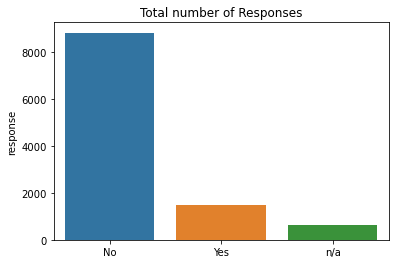

In [75]:
fig1, ax1 = plt.subplots()

ax1.set_title("Total number of Responses")

sns.barplot(x = response.index, y = response)

<AxesSubplot:ylabel='response'>

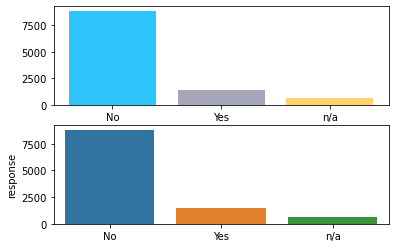

In [78]:
fig1, ax1 = plt.subplots(2,1)
ax1[0].bar(x=response.index, height = response, color = ['#2dc5fa','#a6a7ba','#ffd26f'])
sns.barplot(x = response.index, y = response)

### Response Rate according to Sales Channel

In [45]:
marketing_df['sales channel'].value_counts()

Agent          4121
Branch         3022
Call Center    2141
Web            1626
Name: sales channel, dtype: int64

In [46]:
by_channel = marketing_df['sales channel'].value_counts()

<AxesSubplot:title={'center':'Responses according to Sales Channels'}, ylabel='sales channel'>

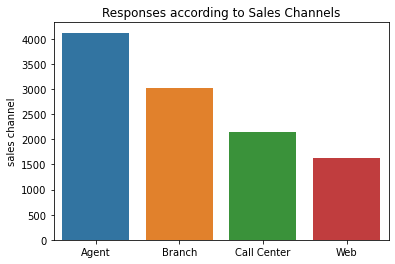

In [48]:
fig2, ax2 = plt.subplots()

ax2.set_title("Responses according to Sales Channels")

sns.barplot(x = by_channel.index, y = by_channel)

### Response Rate according to Total Claim Amount

In [49]:
marketing_df['total claim amount'].value_counts()

316.800000    139
292.800000    136
312.000000    132
350.400000    129
331.200000    119
             ... 
1.208908        1
334.133510      1
238.088581      1
308.981664      1
541.755353      1
Name: total claim amount, Length: 5106, dtype: int64

In [50]:
by_claims = marketing_df['total claim amount'].value_counts()

<AxesSubplot:>

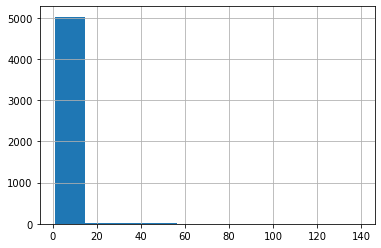

In [51]:
by_claims.hist()

### Response Rate by Income

In [52]:
marketing_df['income'].value_counts()

0        2787
95697      15
60920      11
97131      10
11432      10
         ... 
28647       1
81893       1
53219       1
68197       1
51199       1
Name: income, Length: 5694, dtype: int64

In [53]:
by_income = marketing_df['income'].value_counts()

In [54]:
responses_by_income = marketing_df.groupby(['response']['income'].count().reset_index()

### Correlation Heatmap

In [66]:
marketing_df.corr()

,unnamed: 0,customer lifetime value,income,monthly premium auto,months since policy inception,number of policies,total claim amount
unnamed: 0,1.000000,0.001355,0.008910,0.000863,0.012795,0.002319,-0.000593
customer lifetime value,0.001355,1.000000,0.028306,0.403069,0.016960,0.016024,0.232626
income,0.008910,0.028306,1.000000,-0.009788,-0.005903,-0.009960,-0.354141
monthly premium auto,0.000863,0.403069,-0.009788,1.000000,0.018953,-0.020505,0.631799
months since policy inception,0.012795,0.016960,-0.005903,0.018953,1.000000,-0.009123,0.003095
number of policies,0.002319,0.016024,-0.009960,-0.020505,-0.009123,1.000000,-0.008923
total claim amount,-0.000593,0.232626,-0.354141,0.631799,0.003095,-0.008923,1.000000


In [64]:
sns.heatmap(marketing_df)

ValueError: could not convert string to float: 'DK49336'

### Clean your notebook and make it a readible and presentable with a good documentation that summarizes the Data Cleaning, Exploration Steps that you have performed.

In [ ]:
### Form follows function: I will do that on the weekend after (hopefully) having understood better what I am doing.